In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import VoigtModel, LinearModel

In [321]:
%pylab inline
pylab.rcParams['figure.figsize'] = (21.0, 16.0)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Eichung:-----
##Teil 1: Einstellen der Photomuliplier

In [322]:
cd /home/arrow13/Git/FP/Myonen/Messdate/photomulipier/

/home/arrow13/Git/FP/Myonen/Messdate/photomulipier


In [323]:
def err_coutrate(counts,time,err_time):
    '''
        Bestimmung der Fehlers der logarithmischen Countrate
    '''
    err_ct = np.sqrt(np.square(np.sqrt(counts)/time)+np.square((err_time*counts)/(err_time**2)))
    err_log_ct = err_ct/counts/time
    err_log_c = np.sqrt(counts)/counts
    return err_log_c

In [324]:
err_Zeit = [0.5,2]
err_Spannung = [1,1]
PM_list = []
PM_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM3-backup", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###PM1: Auswertung

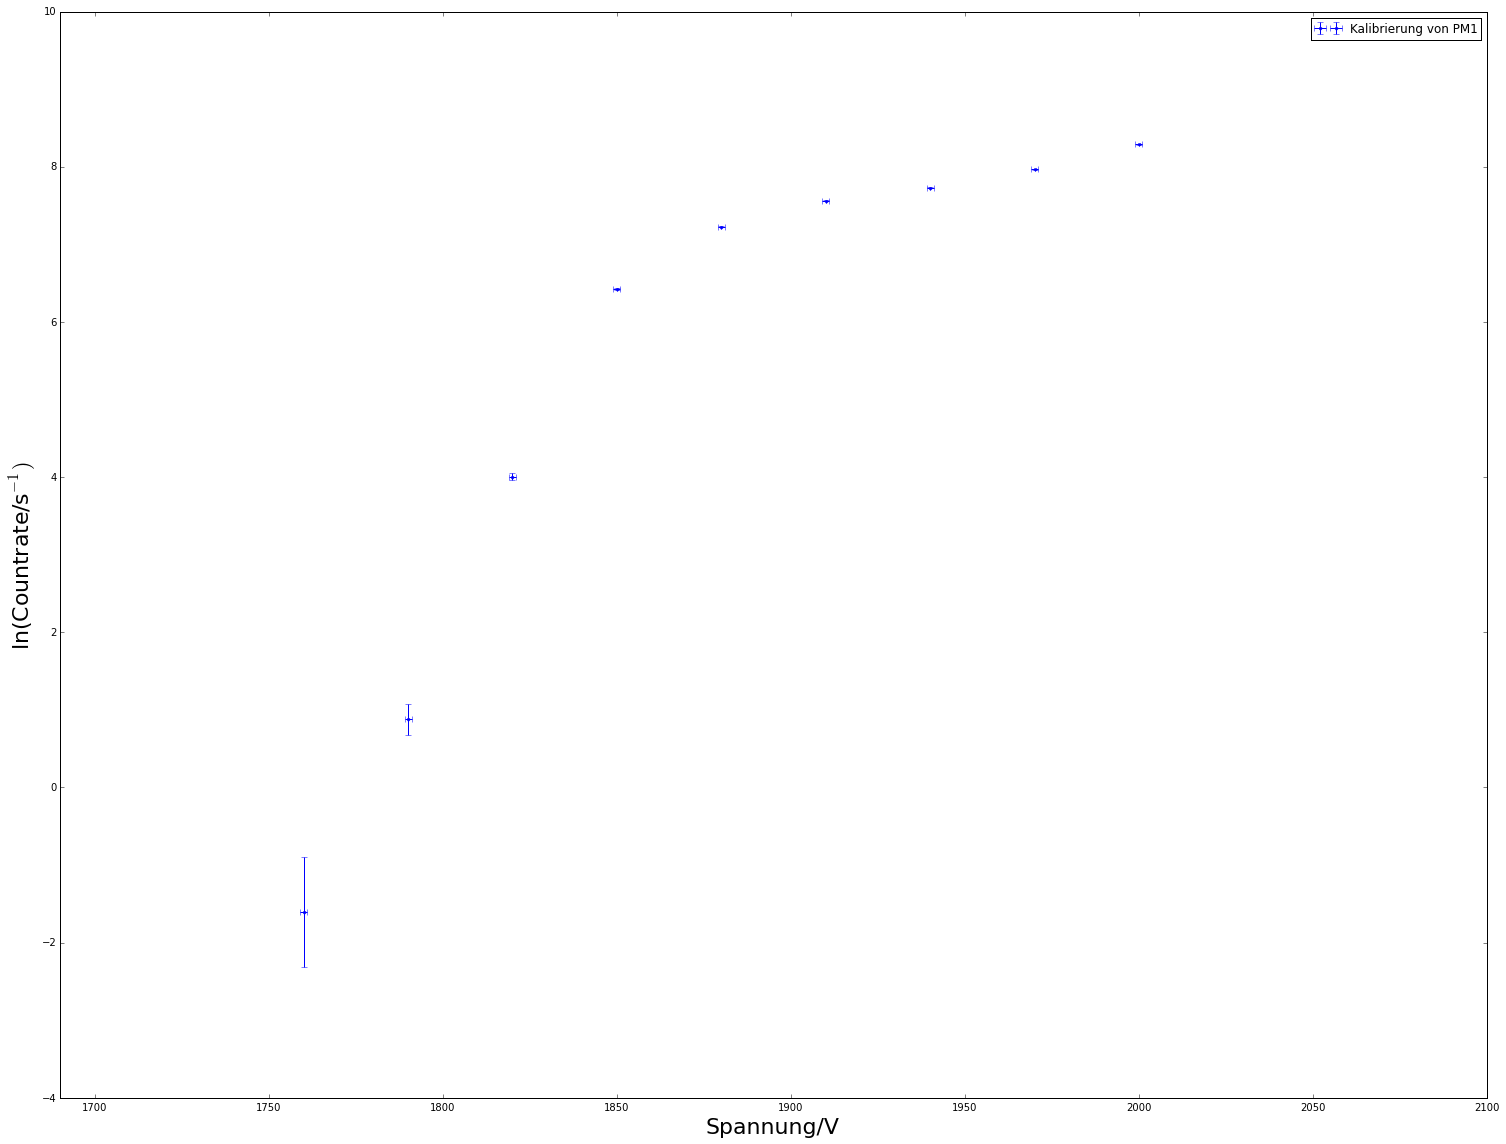

In [325]:
plt.errorbar(PM_list[0][0], np.log(PM_list[0][1]/PM_list[0][2]),err_coutrate(PM_list[0][1],PM_list[0][2],1), xerr=PM_list[0][3], fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1690,2100])
plt.ylim([-4,10])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

###PM2: Auswertung

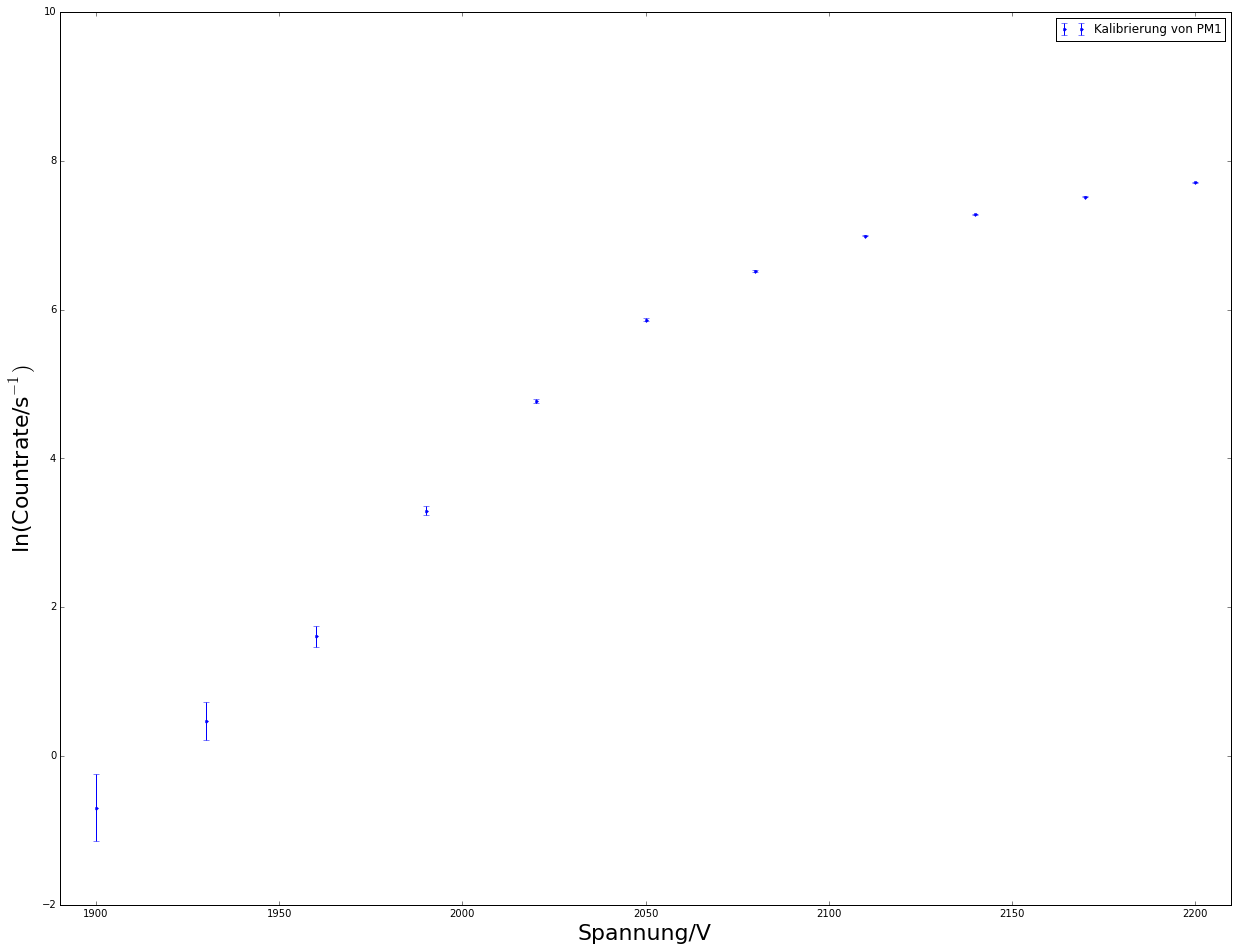

In [326]:
plt.errorbar(PM_list[1][0], np.log(PM_list[1][1]/PM_list[1][2]),err_coutrate(PM_list[1][1],PM_list[1][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###PM3: Auswertung

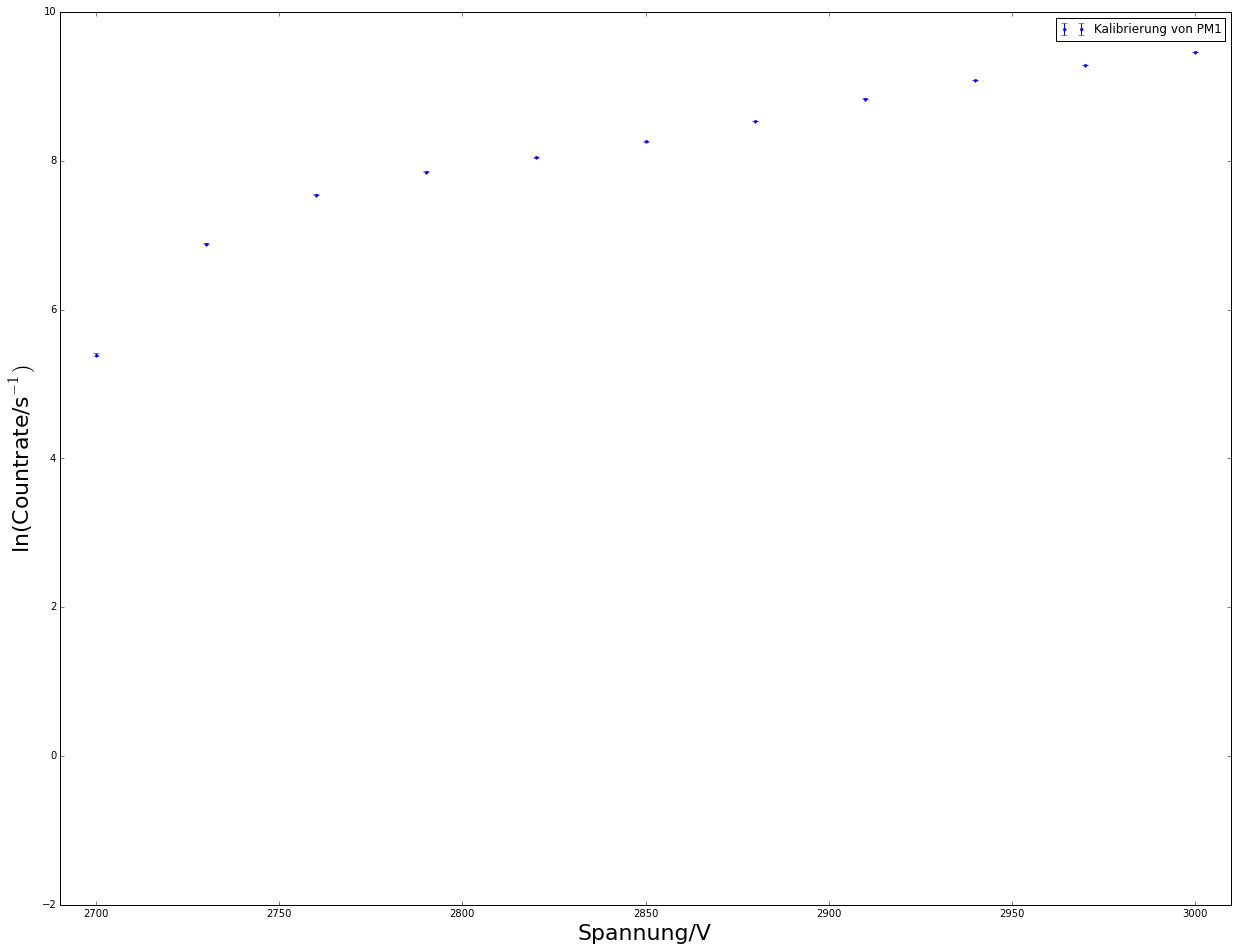

In [327]:
plt.errorbar(PM_list[2][0], np.log(PM_list[2][1]/PM_list[2][2]),err_coutrate(PM_list[2][1],PM_list[2][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([2690,3010])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###PM4: Auswertung

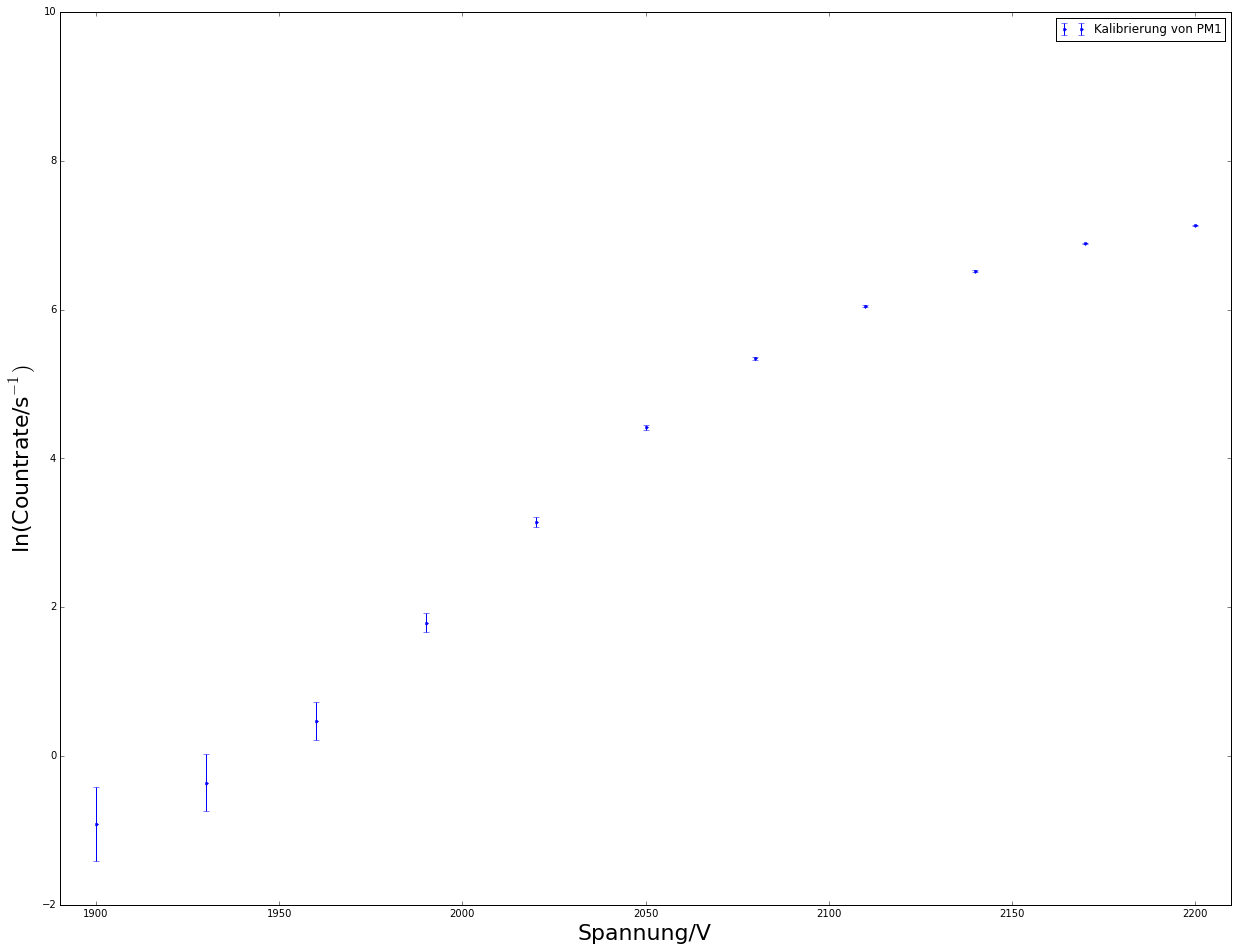

In [328]:
plt.errorbar(PM_list[3][0], np.log(PM_list[3][1]/PM_list[3][2]),err_coutrate(PM_list[3][1],PM_list[3][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###Ergebnisse:
Für die Photomuliplier ergaben sich die folgenden Spannungen:

####PM1: <font color="red">1870V</font>
####PM2: <font color="red">2060V</font>
####PM3: <font color="red">2750V</font>
####PM4: <font color="red">2085V</font>


##Teil2: Diskriminator einstellen

In [329]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Diskriminator/

/home/arrow13/Git/FP/Myonen/Messdate/Diskriminator


In [330]:
D_list = []
D_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM3", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###Diskriminator 1:

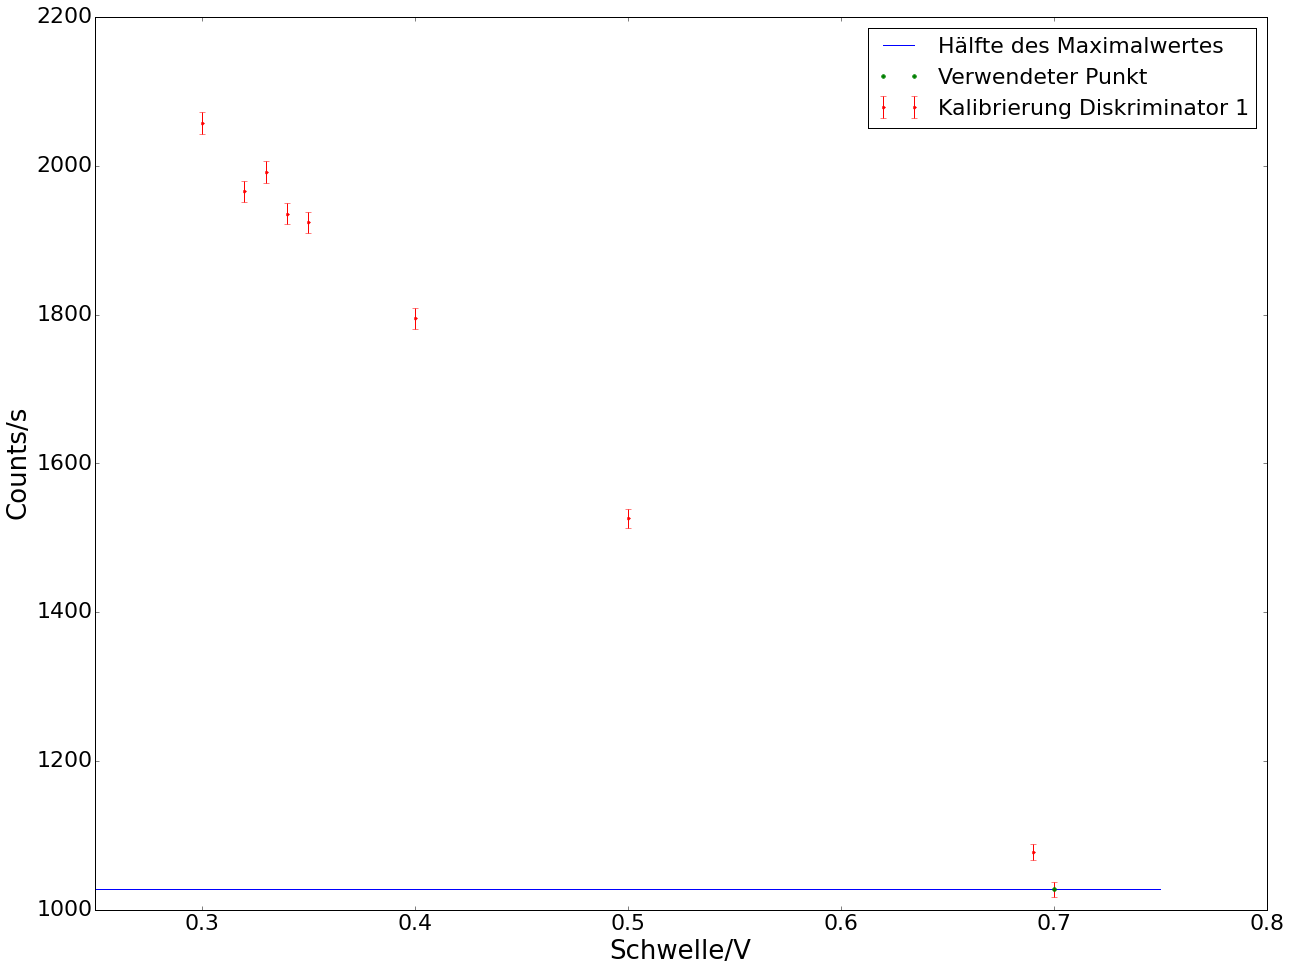

In [331]:
plt.errorbar(D_list[0][0], (D_list[0][1]-D_list[0][2])/10, np.sqrt(D_list[0][1]+D_list[0][2])/10 ,fmt = '. r' , markersize = 6, label = 'Kalibrierung Diskriminator 1')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[0][1][0]-D_list[0][2][0])/20, 'b',label = 'Hälfte des Maximalwertes')
plt.plot(D_list[0][0][-2], (D_list[0][1][-2]-D_list[0][2][-2])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.8])
plt.ylim([1000,2200])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 2

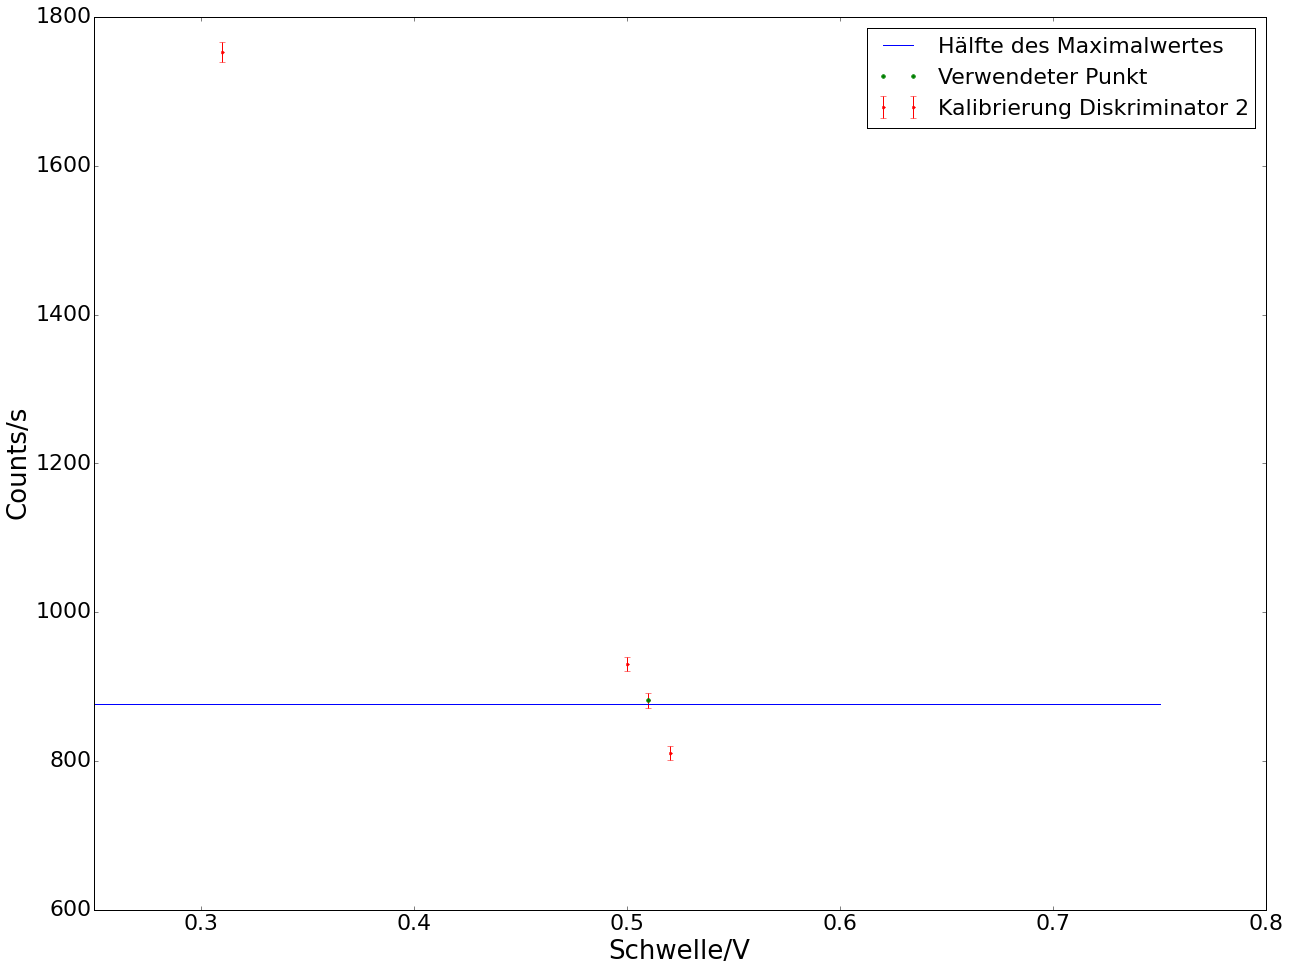

In [332]:
plt.errorbar(D_list[1][0], (D_list[1][1]-D_list[1][2])/10, np.sqrt(D_list[1][1]+D_list[1][2])/10 ,fmt='. r', markersize = 6,label = 'Kalibrierung Diskriminator 2')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[1][1][0]-D_list[1][2][0])/20,'b',label = 'Hälfte des Maximalwertes',)
plt.plot(D_list[1][0][-1], (D_list[1][1][-1]-D_list[1][2][-1])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.8])
plt.ylim([600,1800])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 3

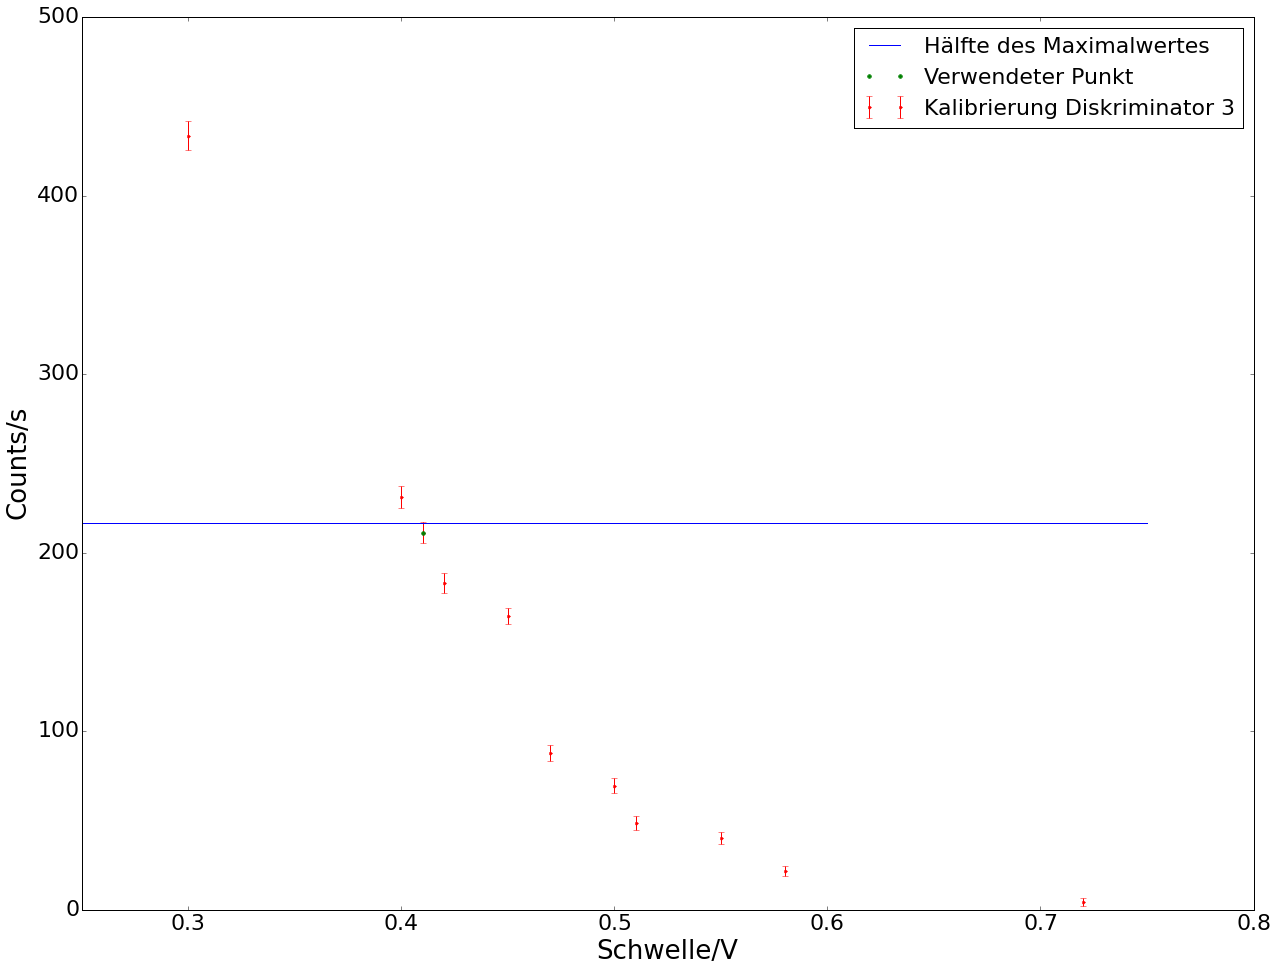

In [333]:
plt.errorbar(D_list[2][0], (D_list[2][1]-D_list[2][2])/10, np.sqrt(D_list[2][1]+D_list[2][2])/10 , fmt='. r', markersize =6,label = 'Kalibrierung Diskriminator 3')
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[2][1][0]-D_list[2][2][0])/20,'b',label = 'Hälfte des Maximalwertes',)
plt.plot(D_list[2][0][-9], (D_list[2][1][-9]-D_list[2][2][-9])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.8])
plt.ylim([0,500])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 4

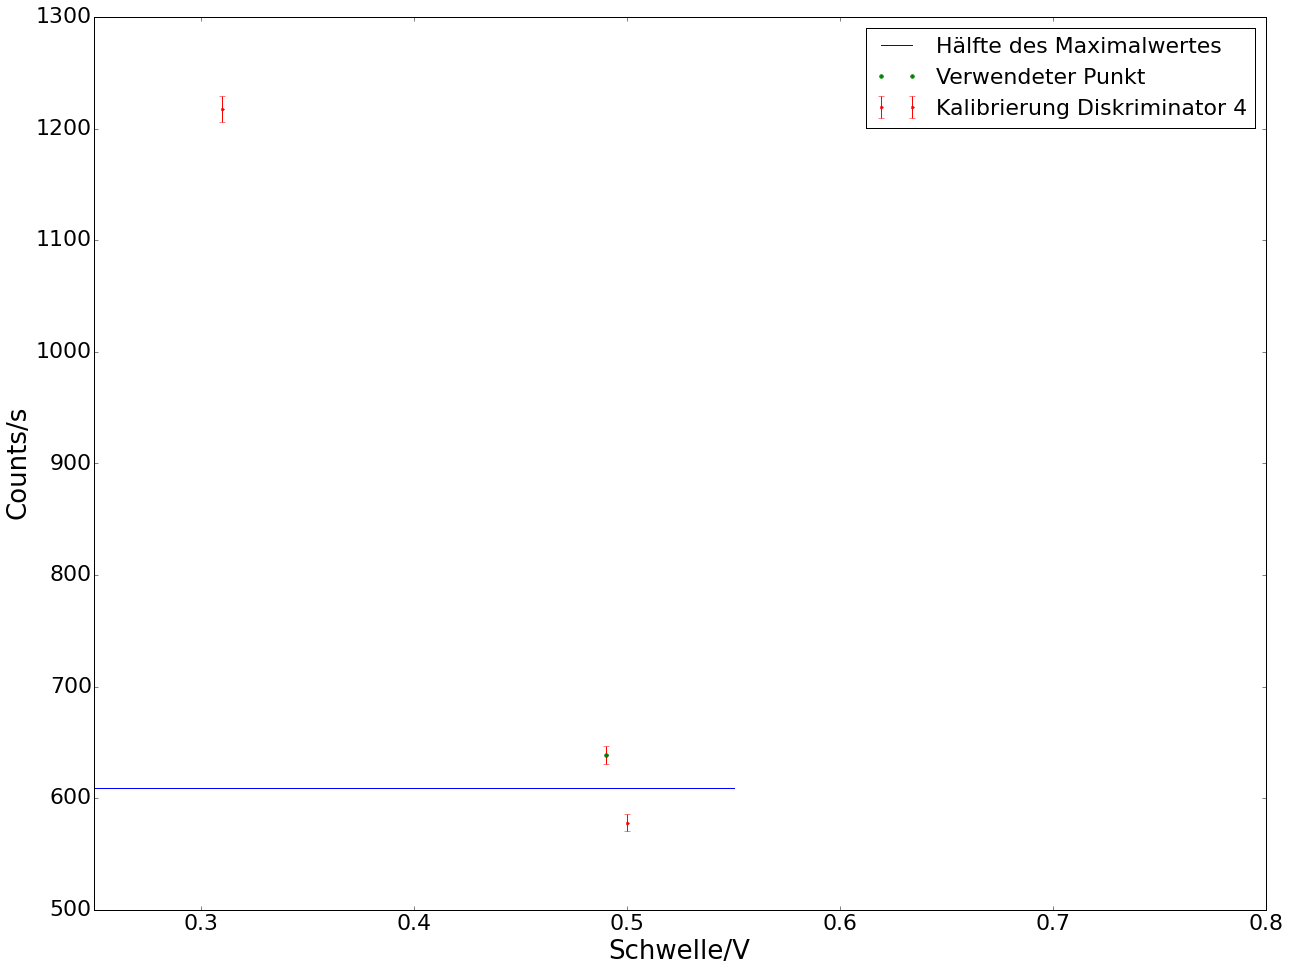

In [334]:
plt.errorbar(D_list[3][0], (D_list[3][1]-D_list[3][2])/10,np.sqrt(D_list[3][1]+D_list[3][2])/10 , fmt='. r', markersize = 6,label = 'Kalibrierung Diskriminator 4')
plt.plot(np.arange(0.25,0.6,0.1),np.arange(0.25,0.6,0.1)/np.arange(0.25,0.6,0.1)*(D_list[3][1][0]-D_list[3][2][0])/20,'b', label = 'Hälfte des Maximalwertes')
plt.plot(D_list[3][0][-2], (D_list[3][1][-2]-D_list[3][2][-2])/10,'.g', label = 'Verwendeter Punkt', markersize = 8)
plt.xlim([0.25,0.6])
plt.legend(loc = 'best', fontsize = 22)
plt.tick_params(labelsize= 22)
plt.xlim([0.25,0.8])
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Ergebnisse:
Als Schwelle für die Diskriminatoren ergaben sich die folgenden Werte:
####Diskriminator 1: <font color="red">0,70V</font>
####Diskriminator 2:  <font color="red">0.51V</font>
####Diskriminator 3:
#####Untere: <font color="red">0,41V</font>
#####Obere: <font color="red">0.52V</font>
####Diskriminator 4: <font color="red">0,49V</font>

##Teil 3: Delay

In [335]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Delay/

/home/arrow13/Git/FP/Myonen/Messdate/Delay


In [336]:
Delay_list = []
Delay_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
Delay_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)

###Delay PM1

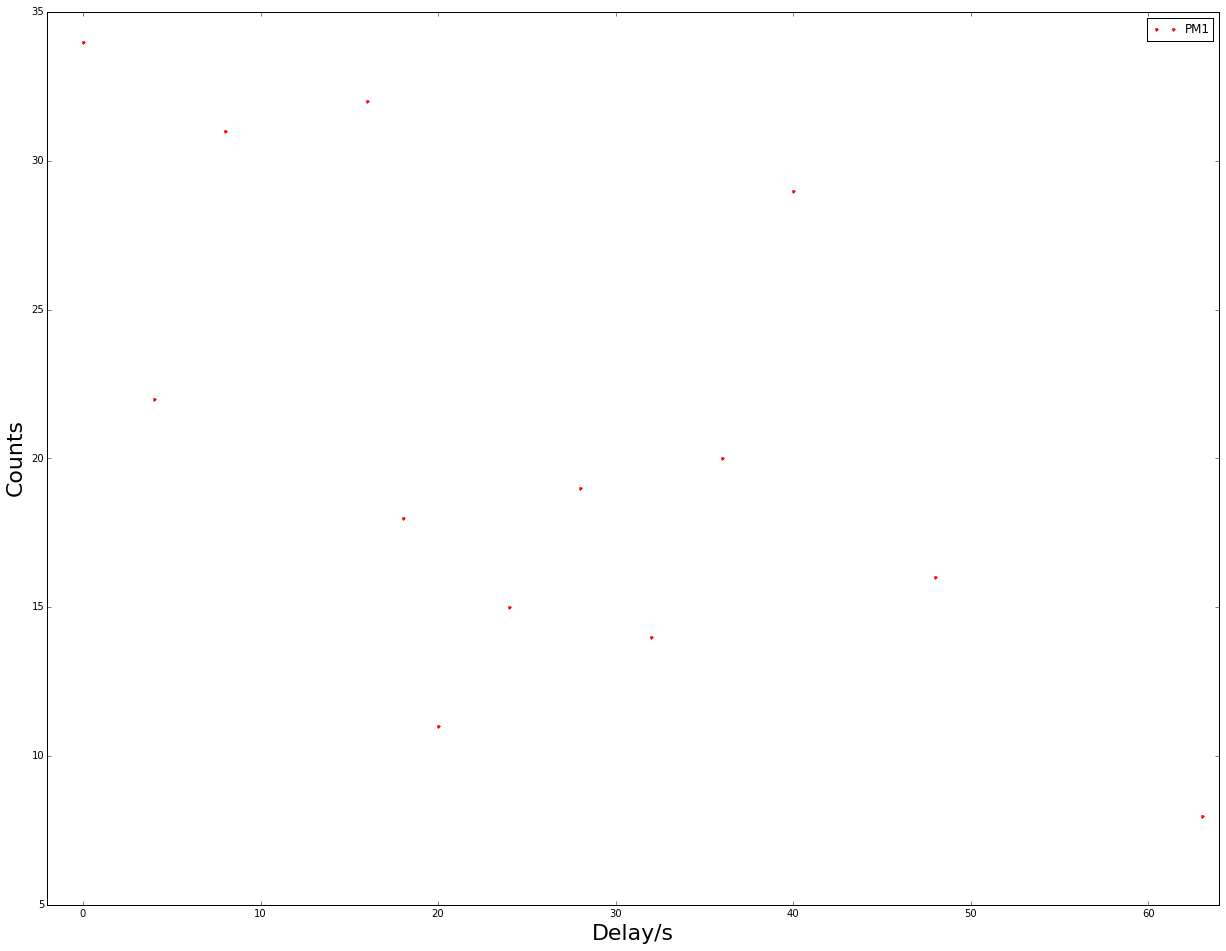

In [337]:
plt.plot(Delay_list[0][0], Delay_list[0][1],'.r', label="PM1")
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.xlim([-2,64])
plt.legend()
plt.show()

###Delay PM2

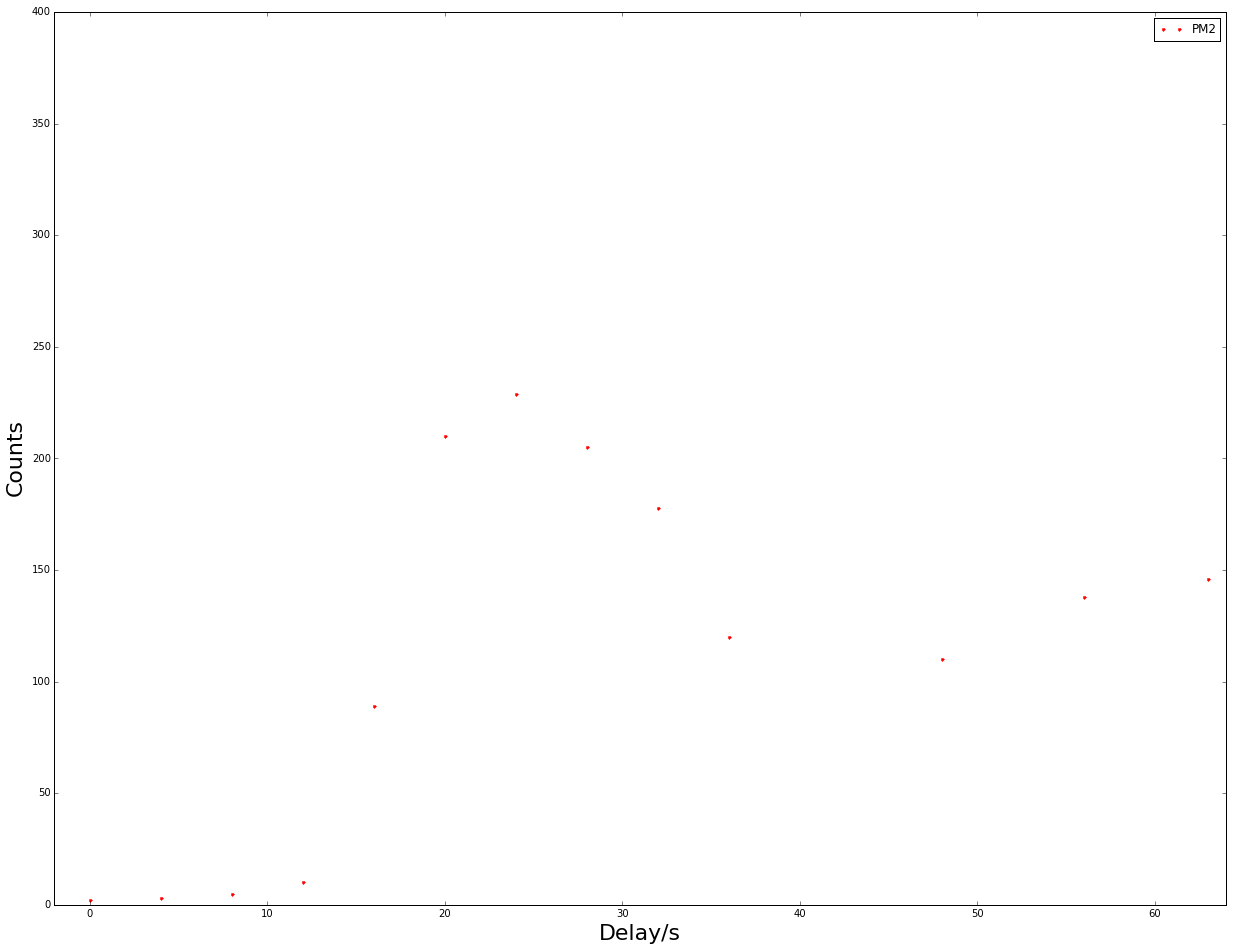

In [338]:
plt.plot(Delay_list[1][0], Delay_list[1][1],'.r', label="PM2")
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.xlim([-2,64])
plt.ylim([0,400])
plt.legend()
plt.show()

###Ergebnisse:
Die bestimmten Delays für PM1 und PM2 sind im folgenden zu sehen.
####Delay PM1:  <font color="red">9</font>
####Delay PM2:  <font color="red">24</font>

##Teil 4: Kanal-Zeit-Kalibrierung

In [351]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit/

/home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit


In [352]:
kanal_zeit = np.array(pd.read_csv("kalib", delim_whitespace=2))
print(kanal_zeit)

[[  1.27200000e+03   2.80000000e+00   1.00000000e-02              nan]
 [  2.34700000e+03   5.06500000e+00   1.00000000e-02              nan]
 [  2.80800000e+03   6.02500000e+00   1.00000000e-02              nan]
 [  3.50600000e+03   7.50000000e+00   1.00000000e-02              nan]
 [  4.01300000e+03   8.56200000e+00   1.00000000e-02              nan]
 [  4.49900000e+03   9.58000000e+00   1.00000000e-02              nan]
 [  5.06800000e+03   1.07800000e+01   1.00000000e-02              nan]
 [  5.48700000e+03   1.16500000e+01   1.00000000e-02              nan]
 [  5.79500000e+03   1.22900000e+01   1.00000000e-02              nan]
 [  5.93700000e+03   1.25900000e+01   1.00000000e-02              nan]
 [  4.38100000e+03   9.33000000e+00   1.00000000e-02              nan]
 [  3.26800000e+03   6.99000000e+00   1.00000000e-02              nan]
 [  1.85100000e+03   4.02000000e+00   1.00000000e-02              nan]
 [  3.42000000e+02   8.40000000e-01   1.00000000e-02              nan]
 [  5.

In [341]:
mod = LinearModel()
guess = mod.guess(kanal_zeit[1],x=kanal_zeit[0])
fit = mod.fit(kanal_zeit[1], guess, x=kanal_zeit[0])
print(fit.fit_report(min_correl=0.25))

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 3
    # data points      = 22
    # variables        = 2
    chi-square         = 0.049
    reduced chi-square = 0.002
[[Variables]]
    slope:       0.00210633 +/- 5.57e-06 (0.26%) (init= 0.002106338)
    intercept:   0.12563062 +/- 0.019429 (15.47%) (init= 0.1256306)
[[Correlations]] (unreported correlations are <  0.250)
    C(slope, intercept)          = -0.840 


In [342]:
print(kanal_zeit[2])

[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]


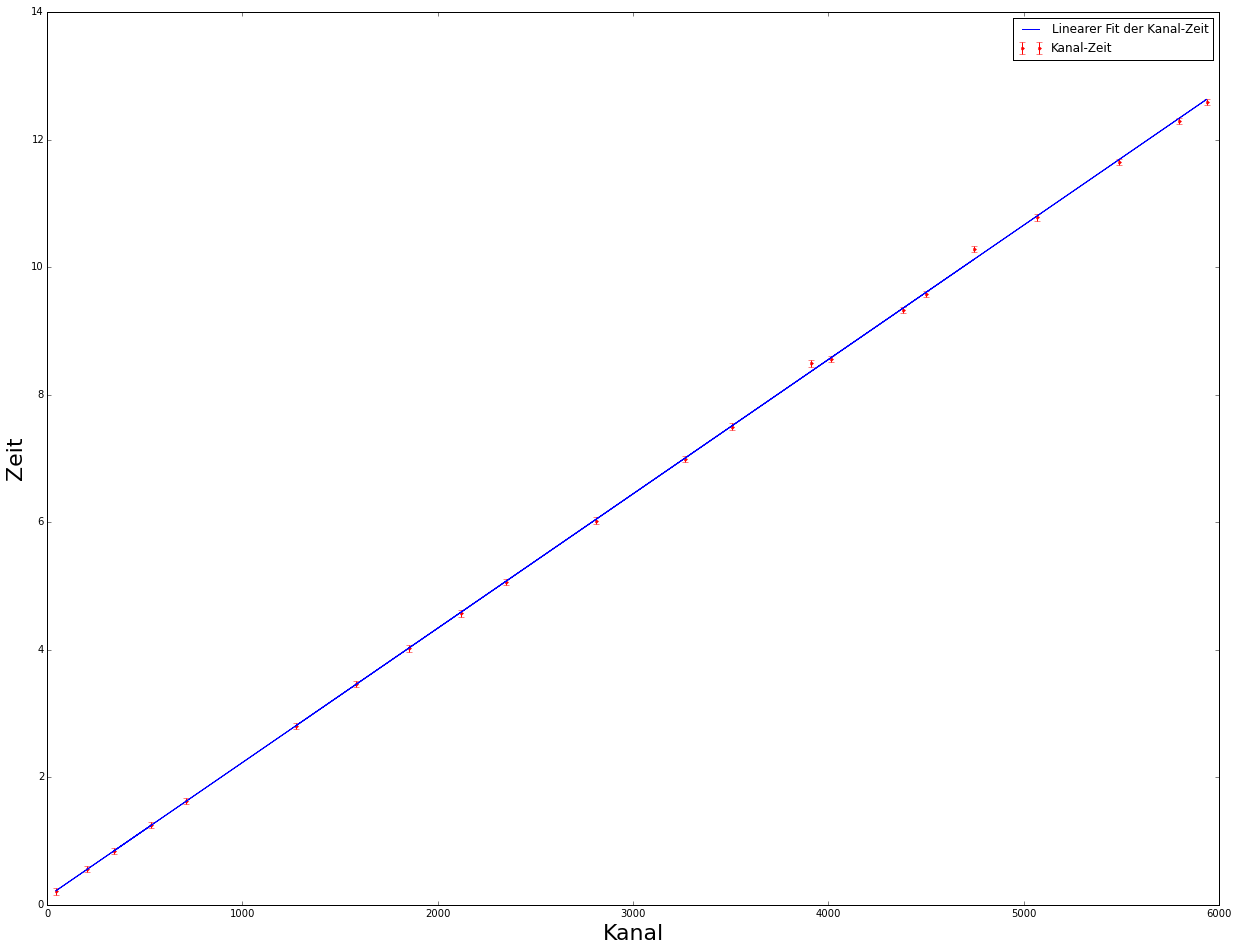

In [343]:
plt.errorbar(kanal_zeit[0], kanal_zeit[1],yerr=kanal_zeit[2]*5,fmt=". r",label="Kanal-Zeit")
plt.plot(kanal_zeit[0], fit.best_fit, '-b', label="Linearer Fit der Kanal-Zeit")
plt.xlabel("Kanal", fontsize=22)
plt.ylabel("Zeit", fontsize=22)
#plt.xlim([-2,64])
#plt.ylim([0,400])
plt.legend()
plt.show()

# Iteration für Tau:

In [354]:
cd /home/arrow13/Git/FP/Myonen/Messdate/

/home/arrow13/Git/FP/Myonen/Messdate


In [496]:
Kanalskip = 16
Kanal_Einträge_Fehler = np.array(pd.read_csv('Kanal_Einträge_Fehler.dat', skiprows= Kanalskip, sep = ' ')).T
print(Kanal_Einträge_Fehler.T)
print(len(Kanal_Einträge_Fehler[0]))
print(len(Kanal_Einträge_Fehler[1]))
def arith_mittel(N_k,t_k):
    mu = 1/np.sum(N_k)*np.sum(N_k*t_k)
    return mu
mu = arith_mittel(Kanal_Einträge_Fehler[1], (0.00211206*(Kanal_Einträge_Fehler[0]-Kanalskip)+0.12)*10**(-6))
T = (0.0021206*(Kanal_Einträge_Fehler[0][-1]-Kanalskip)+0.12)*10**(-6)
print(mu, T)

[[  1.70000000e+01   5.10000000e+02   2.25832000e+01]
 [  1.80000000e+01   1.00000000e+00   1.00000000e+00]
 [  1.90000000e+01   2.00000000e+00   1.41421000e+00]
 ..., 
 [  8.19000000e+03   0.00000000e+00   0.00000000e+00]
 [  8.19100000e+03   0.00000000e+00   0.00000000e+00]
 [  8.19200000e+03   0.00000000e+00   0.00000000e+00]]
8176
8176
1.90107002571e-06 1.74580256e-05


In [419]:
#def tau_iter(mu_iter_1):
#    mu_iter_2 = mu_iter_1 + T*np.exp(-T/mu_iter_1)/(1-np.exp(-T/mu_iter_1))
#    return mu_iter_2

In [420]:
#for i in range (0,10**6):
#    mu.append(tau_iter(mu[i]))
#    if mu[-1]-mu[-2] <= 10**(-6):
#        break
#print(mu[-1])

In [711]:
def tau_iter(T,mu_iter_1,a=0):
    a += 1
    mu_iter_2 = mu_iter_1 + T*np.exp(-T/mu_iter_1)/(1-np.exp(-T/mu_iter_1))
    if abs(mu_iter_2-mu_iter_1) > 1.7939048361441717327480201*10**(-9) and a < 10**2:
        return tau_iter(T,mu_iter_2,a)
    else:
        return mu_iter_2, a

In [712]:
tau_iter(T,mu)

(2.2467872790270999e-06, 100)

In [664]:
T*np.exp(-T/mu)/(1-np.exp(-T/mu))

1.793904836144236e-09